# 从Mongo中读取数据

In [225]:
import pymongo
import pandas as pd
from pandas import Series
client = pymongo.MongoClient('localhost',27017)
db  = client['Graduation_project']
table = db['jobs_info']
data = pd.DataFrame(list(table.find()))
del data['_id']
del data['signal']

In [226]:
data.head() # 61759 rows × 8 columns

,公司名称,公司规模,城市,学历要求,工作经验,省,职位名称,职位薪资
0,北京麦田房产,10000人以上,北京,本科,经验不限,北京,数据分析,6k-10k
1,数美,100-499人,北京,本科,1-3年,北京,数据分析师,20k-35k
2,信永中和,1000-9999人,北京,本科,3-5年,北京,数据分析师,15k-25k
3,HPE,10000人以上,北京,本科,经验不限,北京,数据分析,8k-10k
4,百度本地广告,10000人以上,北京,本科,3-5年,北京,数据分析师,10k-15k


In [227]:
data['职位薪资'].head()[0]

'6k-10k'

## 定义获取int薪资的函数

In [228]:
import re
# 均值函数
def average(job_salary):
    # 取薪资均值----------------
    pattern = re.compile('\d+')
    salary = job_salary
    try:
        res = re.findall(pattern, salary)
        avg_salary = 0
        sum = 0
        for i in res:
            a = int(i)
            sum = sum + a
            avg_salary = sum / 2
    except Exception:
        avg_salary = 0
    # 函数返回值
    return avg_salary

In [229]:
average(data['职位薪资'].head()[0])

8.0

## 添加int薪资列

In [230]:
salary_list = []
for i in range(0,61759):
    avg_sal = average(data['职位薪资'][i])
    salary_list.append(avg_sal)

In [231]:
sal = Series(salary_list)
sal.head()

0     8.0
1    27.5
2    20.0
3     9.0
4    12.5
dtype: float64

In [232]:
data.insert(8,'salary',sal)
data.head()

,公司名称,公司规模,城市,学历要求,工作经验,省,职位名称,职位薪资,salary
0,北京麦田房产,10000人以上,北京,本科,经验不限,北京,数据分析,6k-10k,8.0
1,数美,100-499人,北京,本科,1-3年,北京,数据分析师,20k-35k,27.5
2,信永中和,1000-9999人,北京,本科,3-5年,北京,数据分析师,15k-25k,20.0
3,HPE,10000人以上,北京,本科,经验不限,北京,数据分析,8k-10k,9.0
4,百度本地广告,10000人以上,北京,本科,3-5年,北京,数据分析师,10k-15k,12.5


# 列规整

In [233]:
job_data = data[['省','城市','职位名称','salary','公司名称','公司规模','学历要求']]
job_data.head()

,省,城市,职位名称,salary,公司名称,公司规模,学历要求
0,北京,北京,数据分析,8.0,北京麦田房产,10000人以上,本科
1,北京,北京,数据分析师,27.5,数美,100-499人,本科
2,北京,北京,数据分析师,20.0,信永中和,1000-9999人,本科
3,北京,北京,数据分析,9.0,HPE,10000人以上,本科
4,北京,北京,数据分析师,12.5,百度本地广告,10000人以上,本科


In [234]:
job_data.shape # 61759条数据

(61759, 7)

# 数据清洗

### 移除重复数据

In [235]:
jobs = job_data.drop_duplicates()
jobs.head()

,省,城市,职位名称,salary,公司名称,公司规模,学历要求
0,北京,北京,数据分析,8.0,北京麦田房产,10000人以上,本科
1,北京,北京,数据分析师,27.5,数美,100-499人,本科
2,北京,北京,数据分析师,20.0,信永中和,1000-9999人,本科
3,北京,北京,数据分析,9.0,HPE,10000人以上,本科
4,北京,北京,数据分析师,12.5,百度本地广告,10000人以上,本科


In [236]:
jobs.shape # 去重后共有57052条数据

(57052, 7)

# 数据探索

In [237]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57052 entries, 0 to 61758
Data columns (total 7 columns):
省         57052 non-null object
城市        57052 non-null object
职位名称      57052 non-null object
salary    57052 non-null float64
公司名称      57052 non-null object
公司规模      57052 non-null object
学历要求      57052 non-null object
dtypes: float64(1), object(6)
memory usage: 3.5+ MB


In [238]:
jobs['公司规模'].value_counts()
#jobs['salary'].value_counts().head()

20-99人        18706
100-499人      14218
0-20人          8838
1000-9999人     6871
10000人以上       4833
500-999人       3586
Name: 公司规模, dtype: int64

In [239]:
jobs['学历要求'].value_counts()

本科       26510
大专       19330
学历不限      7305
高中        1767
硕士        1077
中专/中技      916
博士          82
初中及以下       61
中专及以下        4
Name: 学历要求, dtype: int64

In [240]:
jobs['salary'].describe()

count    57052.000000
mean         8.149478
std          6.749024
min          1.500000
25%          4.500000
50%          6.000000
75%          9.000000
max        195.000000
Name: salary, dtype: float64

### 薪资分布图

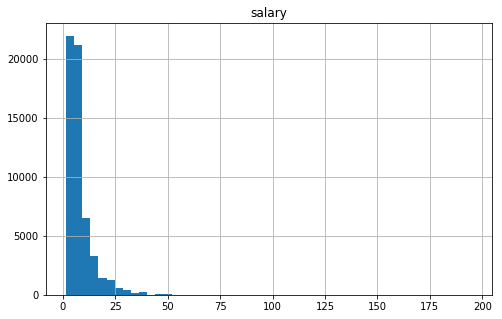

In [241]:
%matplotlib inline
import matplotlib.pyplot as plt
jobs.hist(bins=50, figsize=(8,5))
# save_fig("attribute_histogram_plots")
plt.show()

# 筛选过滤

## 过滤过高值

过滤薪资高于100k的

In [242]:
jobs = jobs[jobs['salary']<60]
jobs.head()

,省,城市,职位名称,salary,公司名称,公司规模,学历要求
0,北京,北京,数据分析,8.0,北京麦田房产,10000人以上,本科
1,北京,北京,数据分析师,27.5,数美,100-499人,本科
2,北京,北京,数据分析师,20.0,信永中和,1000-9999人,本科
3,北京,北京,数据分析,9.0,HPE,10000人以上,本科
4,北京,北京,数据分析师,12.5,百度本地广告,10000人以上,本科


## 过滤过低值

过滤薪资低于4k的

In [243]:
jobs = jobs[jobs['salary']>4]
jobs.head()

,省,城市,职位名称,salary,公司名称,公司规模,学历要求
0,北京,北京,数据分析,8.0,北京麦田房产,10000人以上,本科
1,北京,北京,数据分析师,27.5,数美,100-499人,本科
2,北京,北京,数据分析师,20.0,信永中和,1000-9999人,本科
3,北京,北京,数据分析,9.0,HPE,10000人以上,本科
4,北京,北京,数据分析师,12.5,百度本地广告,10000人以上,本科


In [244]:
jobs.shape

(46274, 7)

In [245]:
jobs.describe()

,salary
count,46274.000000
mean,9.122585
std,6.027931
min,4.500000
25%,5.500000
50%,7.000000
75%,10.500000
max,52.500000


### 过滤后的薪资分布图

薪资分布为4k-60k

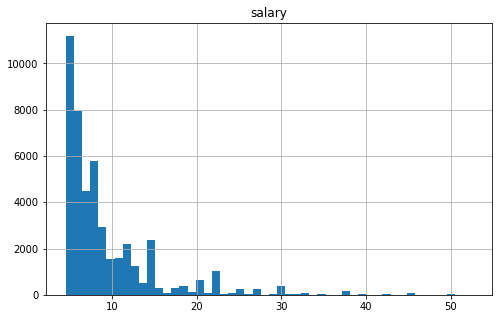

In [246]:
%matplotlib inline
import matplotlib.pyplot as plt
jobs.hist(bins=50, figsize=(8,5))
# save_fig("attribute_histogram_plots")
plt.show()

## 不相关职位的过滤

In [247]:
jobs['职位名称'].value_counts().head()

数据分析师    7479
电商运营     2370
数据分析     1710
网络推广     1550
产品经理     1085
Name: 职位名称, dtype: int64

### 过滤算法实现

In [248]:
dt_test = jobs.astype(str)
y = dt_test[
    dt_test['职位名称'].str.contains('外贸专员|客服经理|商家运营|质检（食品化验员）|其他技术职位|质量检验员|网店运营专员|包培训健身教练|跟单销售员|娱乐内容编辑|交付主管')
           ]

In [249]:
test1 = list(y['职位名称']) # 将含有关键字的列表表示为test1
test2 = list(dt_test['职位名称']) # 将全部表示为test2
ret = list(set(test2) ^ set(test1)) # 列表求差集的方法将含有关键字的行除去

In [250]:
result = dt_test[dt_test['职位名称'].isin(ret)]
result.head()

,省,城市,职位名称,salary,公司名称,公司规模,学历要求
0,北京,北京,数据分析,8.0,北京麦田房产,10000人以上,本科
1,北京,北京,数据分析师,27.5,数美,100-499人,本科
2,北京,北京,数据分析师,20.0,信永中和,1000-9999人,本科
3,北京,北京,数据分析,9.0,HPE,10000人以上,本科
4,北京,北京,数据分析师,12.5,百度本地广告,10000人以上,本科


In [251]:
#result['salary']
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45344 entries, 0 to 61757
Data columns (total 7 columns):
省         45344 non-null object
城市        45344 non-null object
职位名称      45344 non-null object
salary    45344 non-null object
公司名称      45344 non-null object
公司规模      45344 non-null object
学历要求      45344 non-null object
dtypes: object(7)
memory usage: 2.8+ MB


薪资object转换float

In [252]:
import numpy as np
jobs_result = result.copy()
jobs_result['salary'] = pd.to_numeric(jobs_result['salary'])
jobs_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45344 entries, 0 to 61757
Data columns (total 7 columns):
省         45344 non-null object
城市        45344 non-null object
职位名称      45344 non-null object
salary    45344 non-null float64
公司名称      45344 non-null object
公司规模      45344 non-null object
学历要求      45344 non-null object
dtypes: float64(1), object(6)
memory usage: 2.8+ MB


# 初步分析

## 按省份分组

In [253]:
grouped_provence = jobs_result['salary'].groupby(jobs_result['省'])
grouped_provence

In [254]:
grouped_provence.mean().sort_values(ascending=False).round(2).head()

省
北京    18.35
上海    17.52
浙江    15.43
广东    12.05
四川    10.52
Name: salary, dtype: float64

In [255]:
#grouped_provence.mean().values

In [256]:
from pyecharts import Bar
x_prov = grouped_provence.mean().sort_values(ascending=False).index
y_prov = grouped_provence.mean().sort_values(ascending=False).round(1).values
bar = Bar("各省数据分析师月均薪资",width=1000, height=600)
bar.add("各省数据分析师月均薪资", x_prov, y_prov,mark_point=["max","min"],mark_line=["average"],is_label_show=True,is_more_utils=True
        ,xaxis_interval=0, xaxis_rotate=30, yaxis_min=4,yaxis_rotate=30)

In [257]:
from pyecharts import Map

map = Map("全国数据分析师薪资", width=1200, height=600)
map.add("", x_prov, y_prov, maptype='china',is_label_show=True,is_visualmap=True,visual_range=[5, 20],is_map_symbol_show=False,
    visual_text_color="#000")

map

## 按城市分组

In [258]:
grouped_city = jobs_result['salary'].groupby(jobs_result['城市'])
grouped_city.mean().sort_values(ascending=False).round(2).head()

城市
北京    18.35
上海    17.52
杭州    17.19
深圳    16.54
绍兴    16.48
Name: salary, dtype: float64

In [259]:
jobs_js = jobs_result[jobs_result['省']=='江苏']

In [260]:
grouped_js = jobs_js['salary'].groupby(jobs_js['城市'])
grouped_js.mean().sort_values(ascending=False).round(2).head()

城市
连云港    10.51
南京     10.45
扬州     10.40
徐州     10.39
淮安     10.39
Name: salary, dtype: float64

In [261]:
x_js = ['连云港市','南京市','扬州市','徐州市','淮安市','泰州市','宿迁市','镇江市','南通市','盐城市','常州市','苏州市','无锡市']
y_js = grouped_js.mean().sort_values(ascending=False).values.round(2)

In [262]:
from pyecharts import Map

map = Map("江苏数据分析师薪资", width=1200, height=600)
map.add(
    "", x_js, y_js, maptype="江苏", is_visualmap=True, visual_text_color="#000",visual_range=[7, 11],
    is_map_symbol_show=False,is_label_show=True
)
map

## 按学历分组

In [263]:
grouped_degree = jobs_result['salary'].groupby(jobs_result['学历要求'])
grouped_degree.mean().sort_values(ascending=False).round(2).head()

学历要求
博士       25.72
硕士       14.73
本科       10.77
学历不限      7.67
中专/中技     7.51
Name: salary, dtype: float64

In [264]:
x_degree = grouped_degree.mean().sort_values(ascending=False).index
y_degree = grouped_degree.mean().sort_values(ascending=False).round(1).values
bar = Bar("不同学历数据分析师月均薪资",width=1000, height=600)
bar.add("月均薪资", x_degree, y_degree,mark_point=["max","min"],mark_line=["average"],is_label_show=True,is_more_utils=True
        ,xaxis_interval=0, xaxis_rotate=30, yaxis_min=0,yaxis_rotate=30)

## 按公司规模分组

In [265]:
grouped_scale = jobs_result['salary'].groupby(jobs_result['公司规模'])
grouped_scale.mean().sort_values(ascending=False).round(2).head()

公司规模
10000人以上      13.46
1000-9999人    10.42
500-999人       9.78
100-499人       9.41
20-99人         7.90
Name: salary, dtype: float64

In [266]:
x_scale = grouped_scale.mean().sort_values(ascending=False).index
y_scale = grouped_scale.mean().sort_values(ascending=False).round(1).values
bar = Bar("不同规模企业中数据分析师月均薪资",width=700, height=500)
bar.add("月均薪资", x_scale, y_scale,mark_point=["max","min"],mark_line=["average"],is_label_show=True,is_more_utils=True
        ,xaxis_interval=0, xaxis_rotate=30, yaxis_min=5,yaxis_rotate=30)